In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [26]:
# 한글 폰트 설정
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

In [27]:
# 주피터 노트북 자동완성 기능 위해 필요
%config Completer.use_jedi = False

1. 리더보드
심사 기준: RMSLE(Root Mean Squared Logarithmic Error) of ECLO
ECLO: 인명피해 심각도(Equivalent Casualty Loss Only)
ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1
다른 유형의 사고들을 부상자 기준으로 환산하여 사고의 심각 정도와 위험도를 표현하는 방법
부상자: 교통사고로 인하여 5일 미만의 치료를 요하는 부상을 입은 경우 
Public Score: 전체 테스트 데이터 중 30%
Private Score: 전체 테스트 데이터 중 70%

In [10]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')
df_train.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


<Axes: >

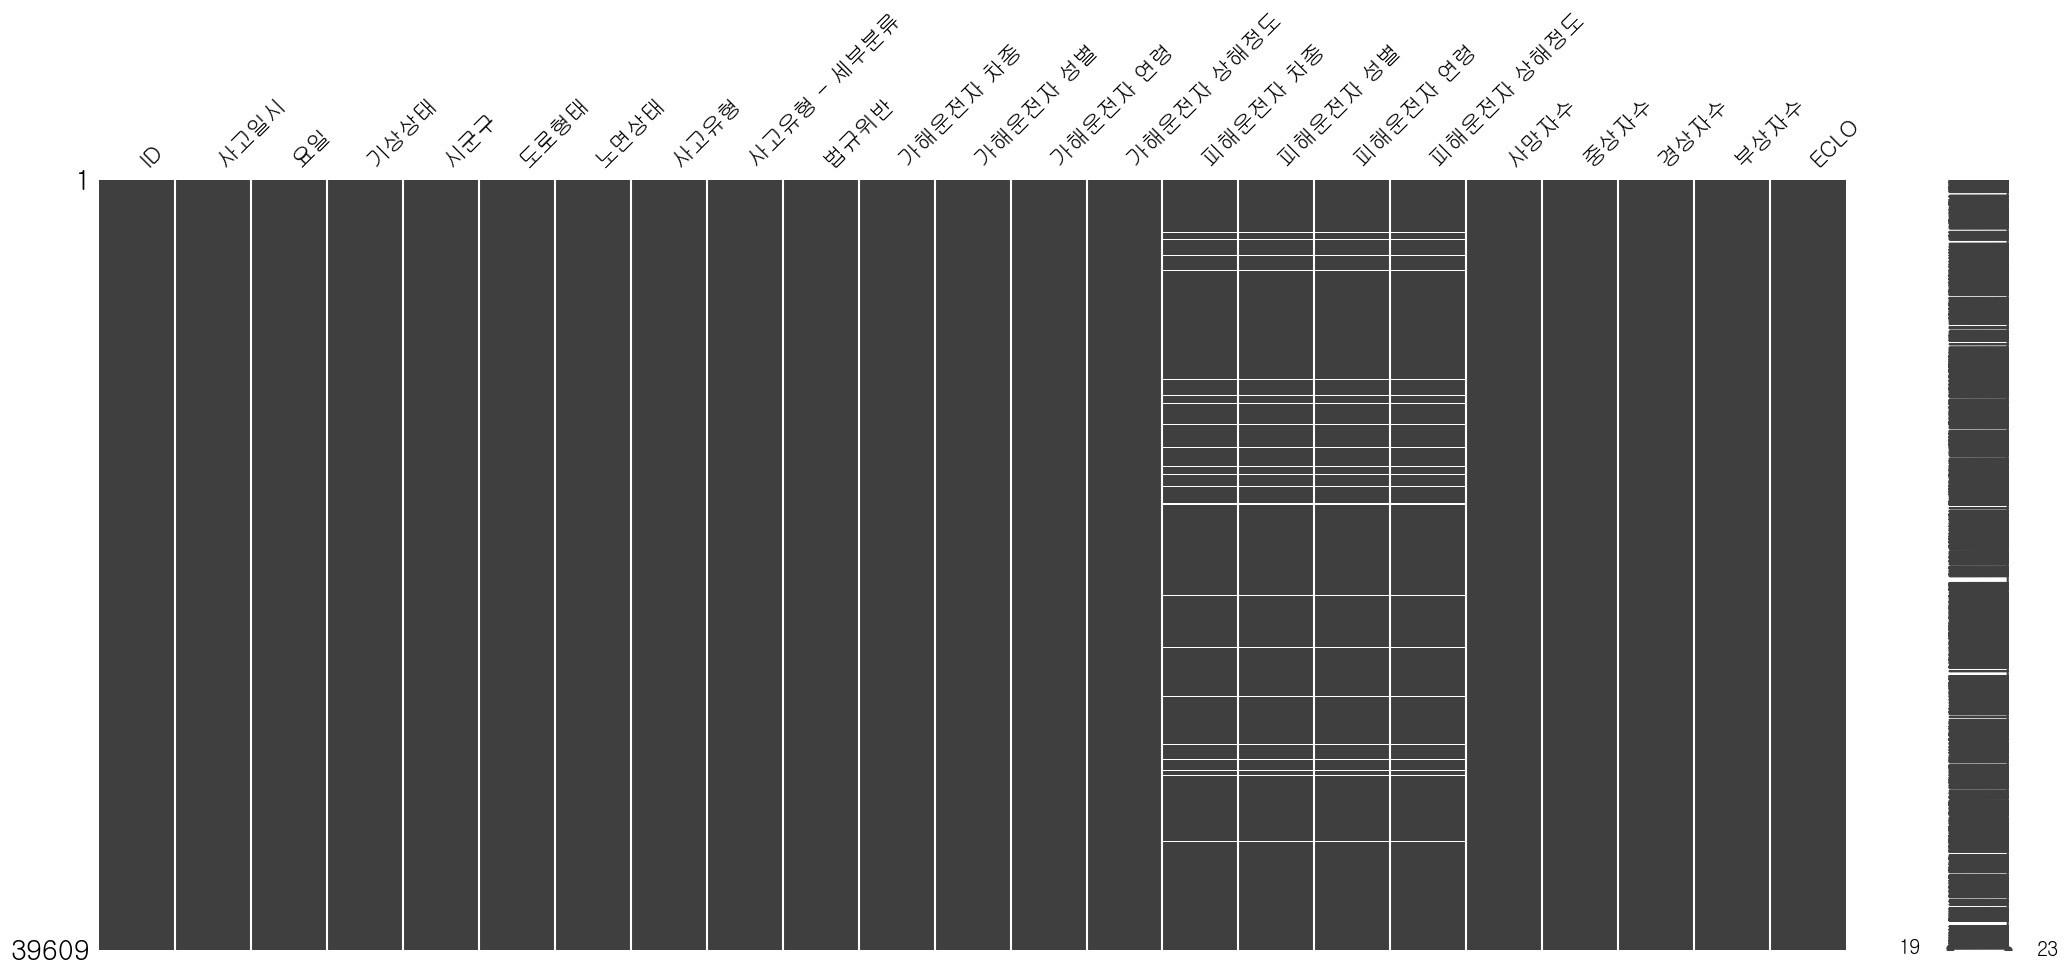

In [33]:
msno.matrix(df_train)

In [34]:
df_train.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

<Axes: >

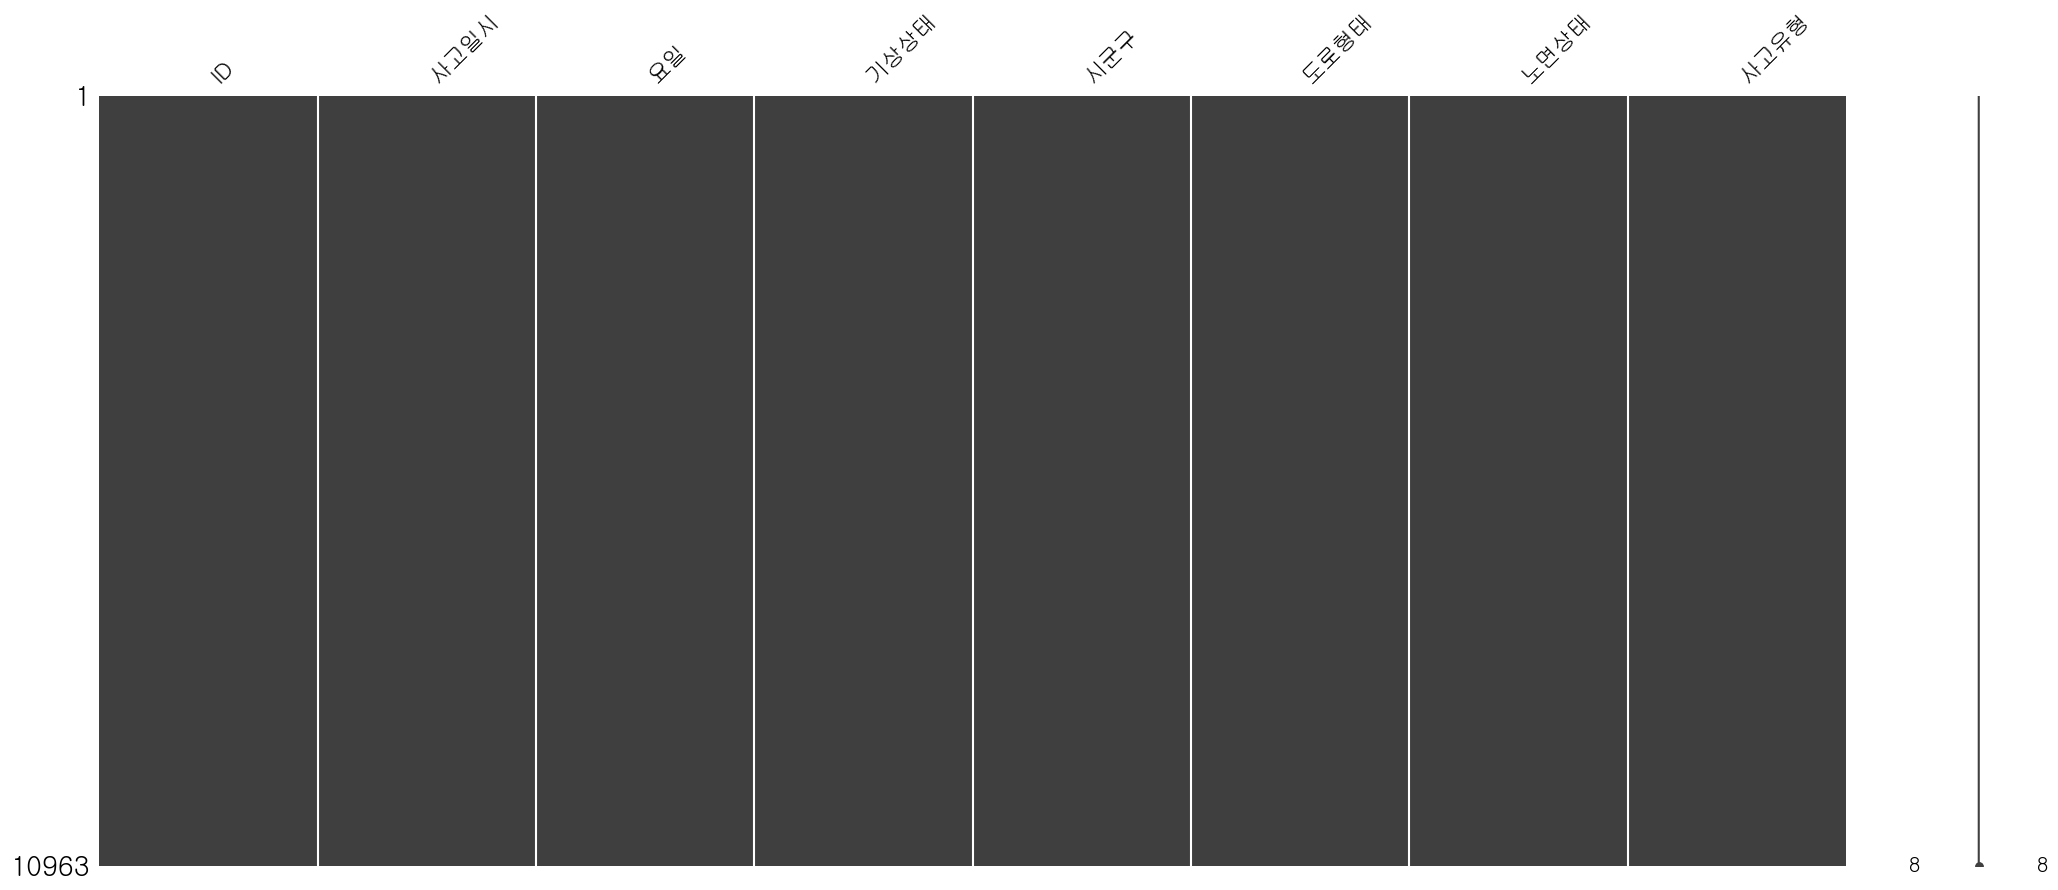

In [35]:
msno.matrix(df_test)

In [36]:
df_test.isnull().sum()

ID      0
사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64

In [ ]:
df_train.drop(['ID'],axis =1,inplace=True)

In [71]:
df_train = df_train.dropna()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38618 entries, 0 to 39608
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사고일시         38618 non-null  object
 1   요일           38618 non-null  object
 2   기상상태         38618 non-null  object
 3   시군구          38618 non-null  object
 4   도로형태         38618 non-null  object
 5   노면상태         38618 non-null  object
 6   사고유형         38618 non-null  object
 7   사고유형 - 세부분류  38618 non-null  object
 8   법규위반         38618 non-null  object
 9   가해운전자 차종     38618 non-null  object
 10  가해운전자 성별     38618 non-null  object
 11  가해운전자 연령     38618 non-null  object
 12  가해운전자 상해정도   38618 non-null  object
 13  피해운전자 차종     38618 non-null  object
 14  피해운전자 성별     38618 non-null  object
 15  피해운전자 연령     38618 non-null  object
 16  피해운전자 상해정도   38618 non-null  object
 17  사망자수         38618 non-null  int64 
 18  중상자수         38618 non-null  int64 
 19  경상자수         38618 non-null  i

In [95]:
columns_object = df_train.select_dtypes(include=['object']).columns.tolist()

for column in columns_object:
    print(f'{column} : {df_train[column].nunique()}')
    print(df_train[column].unique())
    print()

사고일시 : 17798
['2019-01-01 00' '2019-01-01 01' '2019-01-01 02' ... '2021-12-31 21'
 '2021-12-31 22' '2021-12-31 23']

요일 : 7
['화요일' '수요일' '목요일' '금요일' '토요일' '일요일' '월요일']

기상상태 : 6
['맑음' '흐림' '기타' '비' '안개' '눈']

시군구 : 199
['대구광역시 중구 대신동' '대구광역시 달서구 감삼동' '대구광역시 수성구 두산동' '대구광역시 북구 복현동'
 '대구광역시 동구 신암동' '대구광역시 수성구 지산동' '대구광역시 달서구 상인동' '대구광역시 북구 태전동'
 '대구광역시 동구 지묘동' '대구광역시 서구 평리동' '대구광역시 동구 신기동' '대구광역시 서구 상리동'
 '대구광역시 달서구 월성동' '대구광역시 북구 구암동' '대구광역시 동구 신천동' '대구광역시 수성구 만촌동'
 '대구광역시 중구 남산동' '대구광역시 서구 비산동' '대구광역시 북구 침산동' '대구광역시 달서구 두류동'
 '대구광역시 수성구 신매동' '대구광역시 달서구 대곡동' '대구광역시 달성군 유가읍' '대구광역시 달성군 논공읍'
 '대구광역시 동구 율하동' '대구광역시 수성구 시지동' '대구광역시 동구 봉무동' '대구광역시 달성군 다사읍'
 '대구광역시 중구 동산동' '대구광역시 서구 이현동' '대구광역시 남구 이천동' '대구광역시 수성구 수성동4가'
 '대구광역시 북구 노원동3가' '대구광역시 북구 서변동' '대구광역시 북구 관음동' '대구광역시 북구 학정동'
 '대구광역시 수성구 파동' '대구광역시 수성구 상동' '대구광역시 달서구 이곡동' '대구광역시 동구 효목동'
 '대구광역시 북구 읍내동' '대구광역시 중구 남성로' '대구광역시 달서구 죽전동' '대구광역시 남구 대명동'
 '대구광역시 북구 동천동' '대구광역시 동구 지저동' '대구광역시 북구 사수동' '대구광역시 중구 덕산동'
 '대구광역시 달서구 본리동' '대구광역시 동구 용계

In [108]:
columns_object_low_twelve = [col for col in columns_object if col != '요일' and df_train[col].nunique() <= 12]
columns_object_low_twelve

['기상상태',
 '도로형태',
 '노면상태',
 '사고유형',
 '사고유형 - 세부분류',
 '법규위반',
 '가해운전자 차종',
 '가해운전자 성별',
 '가해운전자 상해정도',
 '피해운전자 성별',
 '피해운전자 상해정도']

In [110]:
len(columns_object_low_twelve)

11

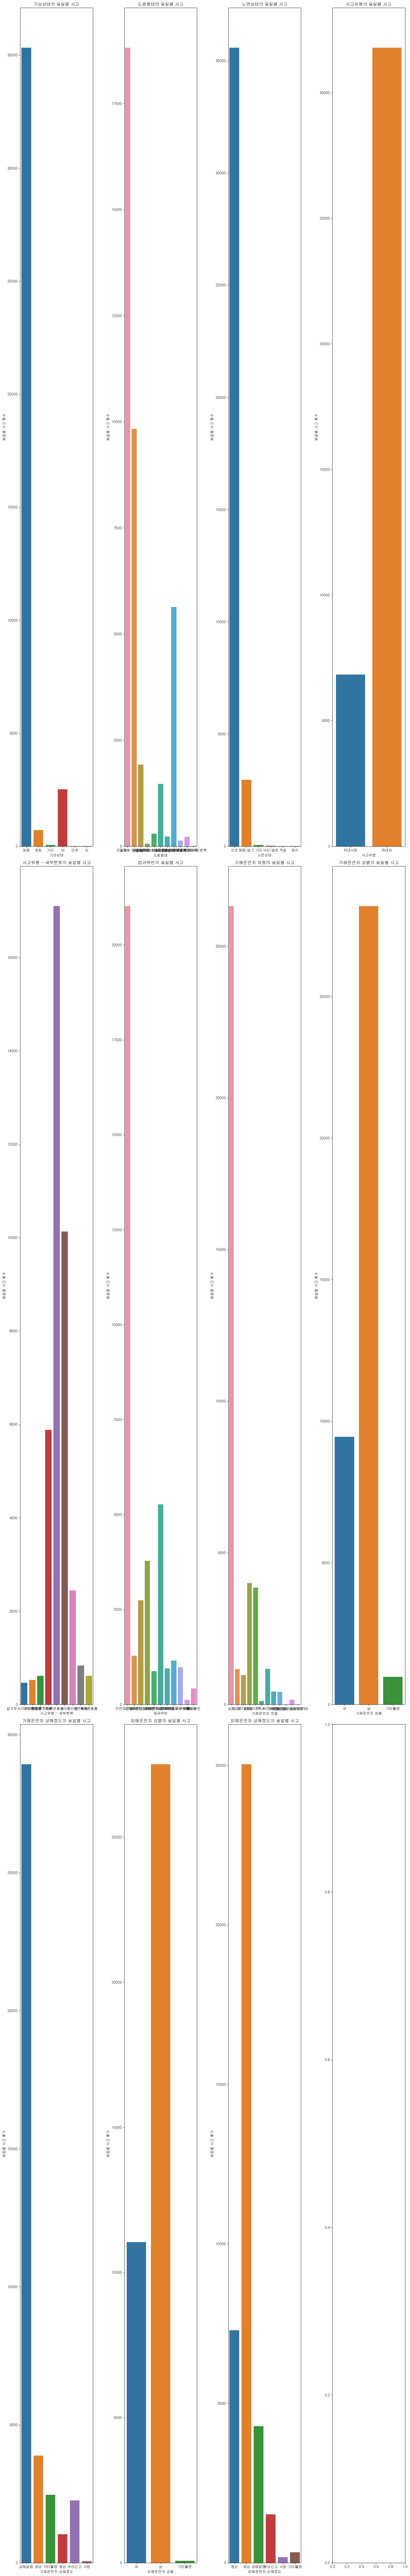

In [112]:
# 새로운 Figure와 Axes 생성
fig, axes = plt.subplots(nrows= 3 , ncols=4, figsize=(16, 100))

for i, column in enumerate(columns_object_low_twelve):

     # subplot에 그래프 그리기
    row = i // 4  # 행 인덱스 계산
    col = i % 4   # 열 인덱스 계산    
        
    # subplot에 그래프 그리기
    sns.countplot(x=column, data=df_train, ax=axes[row,col])
    axes[row, col].set_ylabel('요일별 사고 횟수')
    axes[row, col].set_title(f'{column}의 요일별 사고')

plt.tight_layout()
plt.show()

<Axes: xlabel='요일', ylabel='count'>

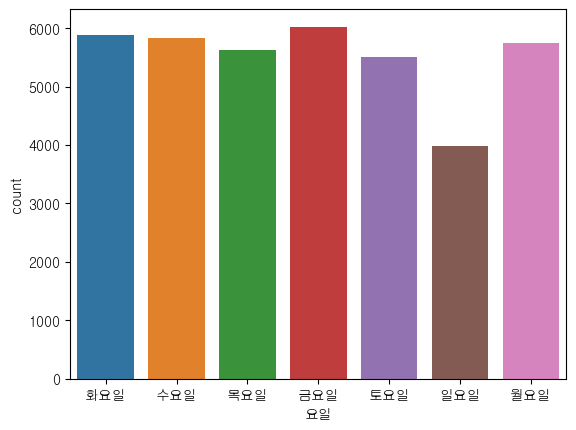

In [86]:
sns.countplot(x= '요일', data=df_train)

기상상태 is done
도로형태 is done
노면상태 is done
사고유형 is done
사고유형 - 세부분류 is done
법규위반 is done
가해운전자 차종 is done
가해운전자 성별 is done
가해운전자 상해정도 is done
피해운전자 성별 is done
피해운전자 상해정도 is done


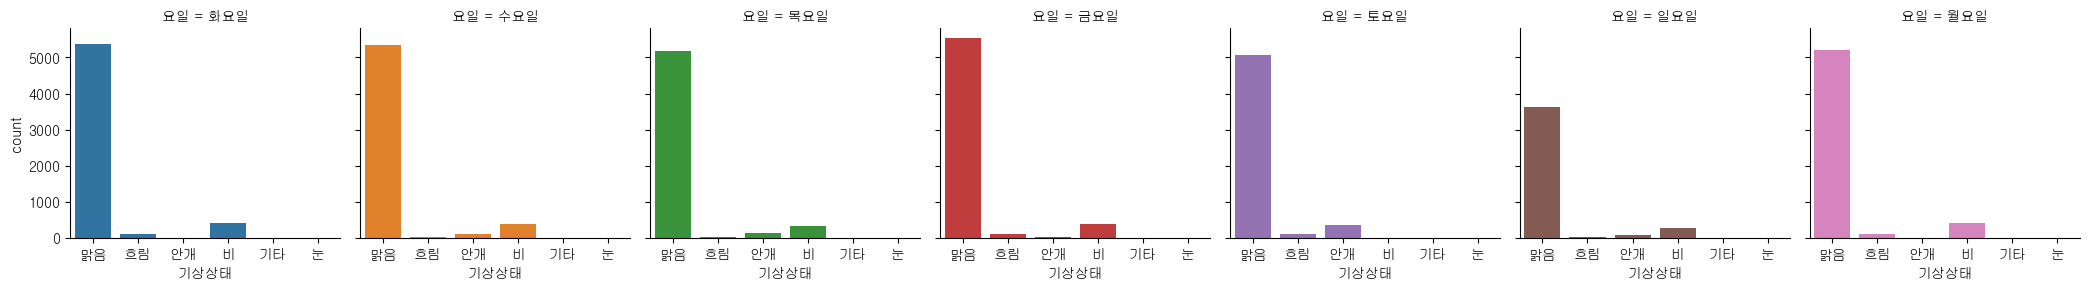

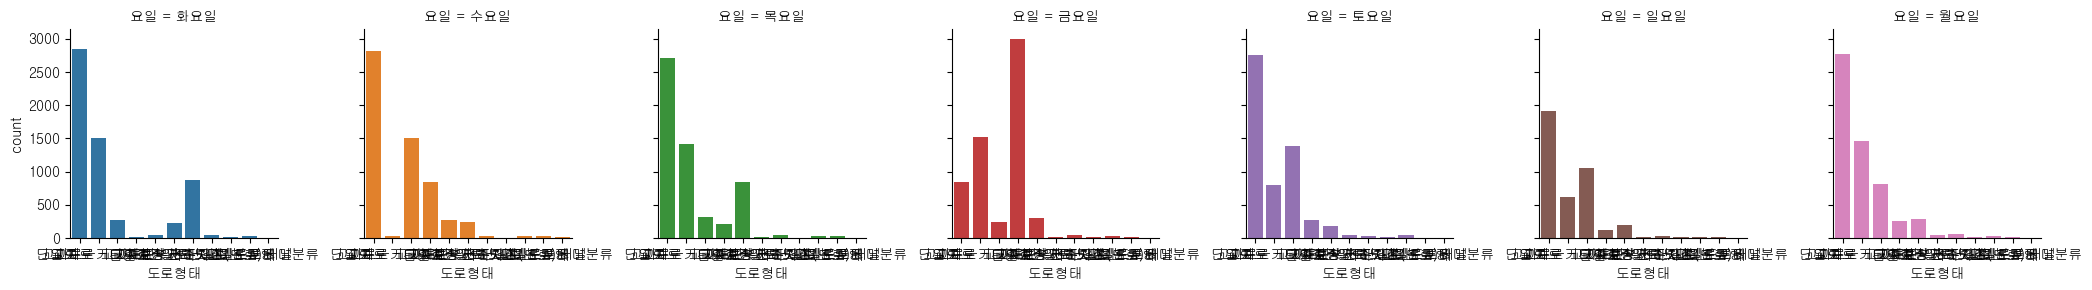

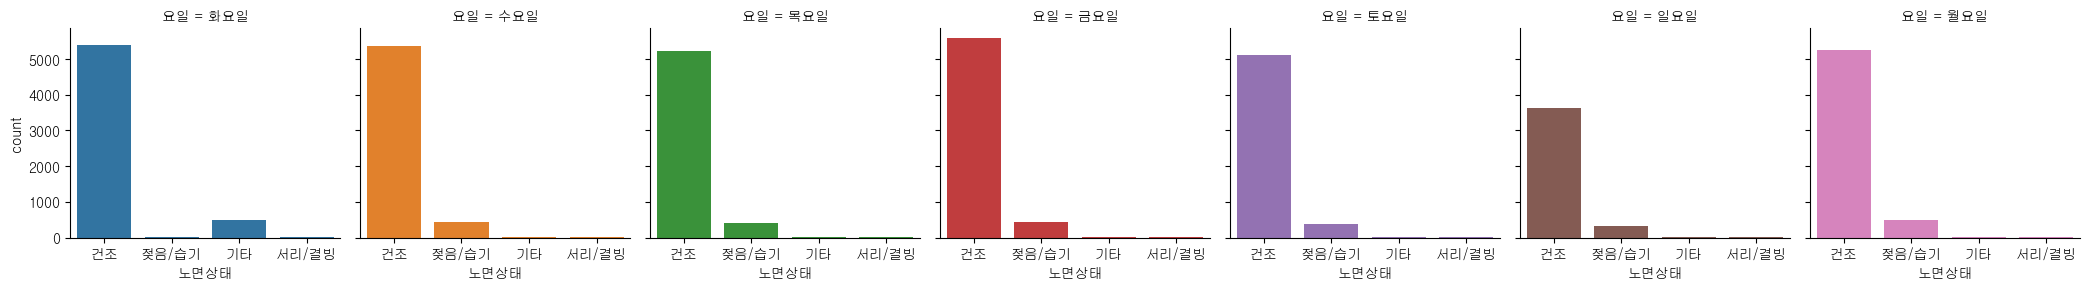

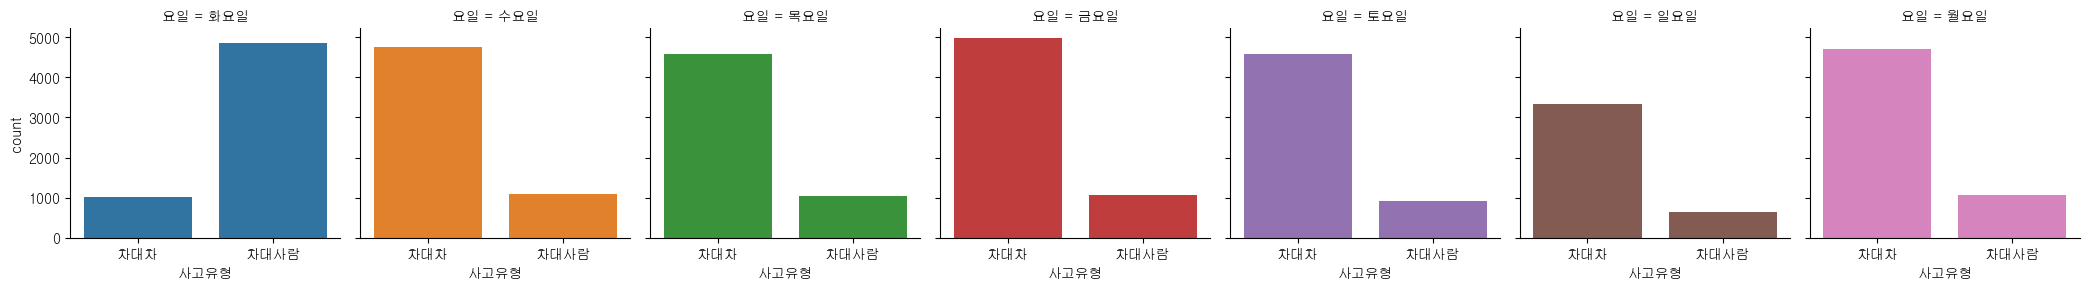

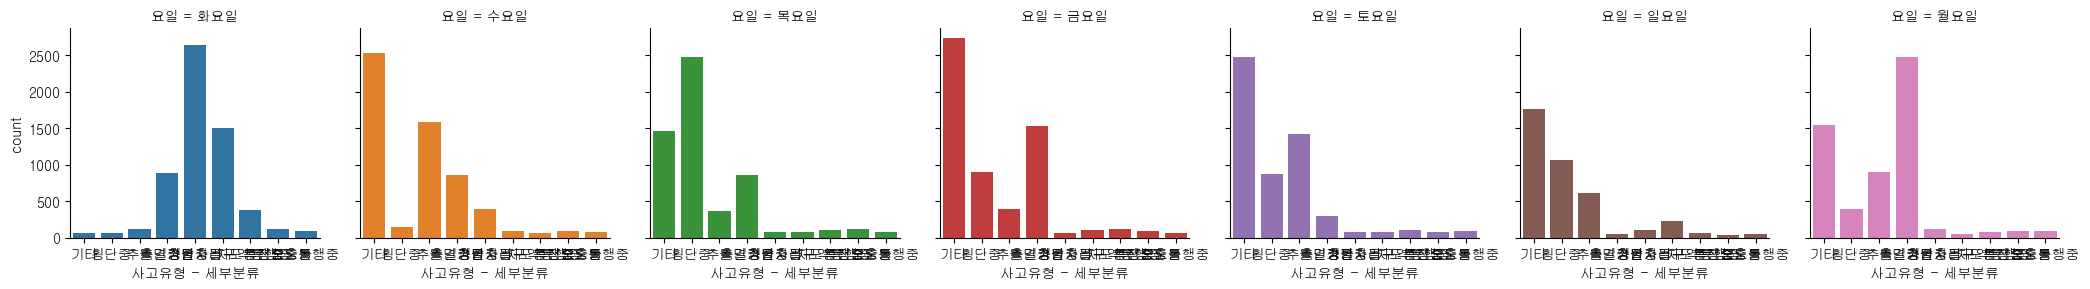

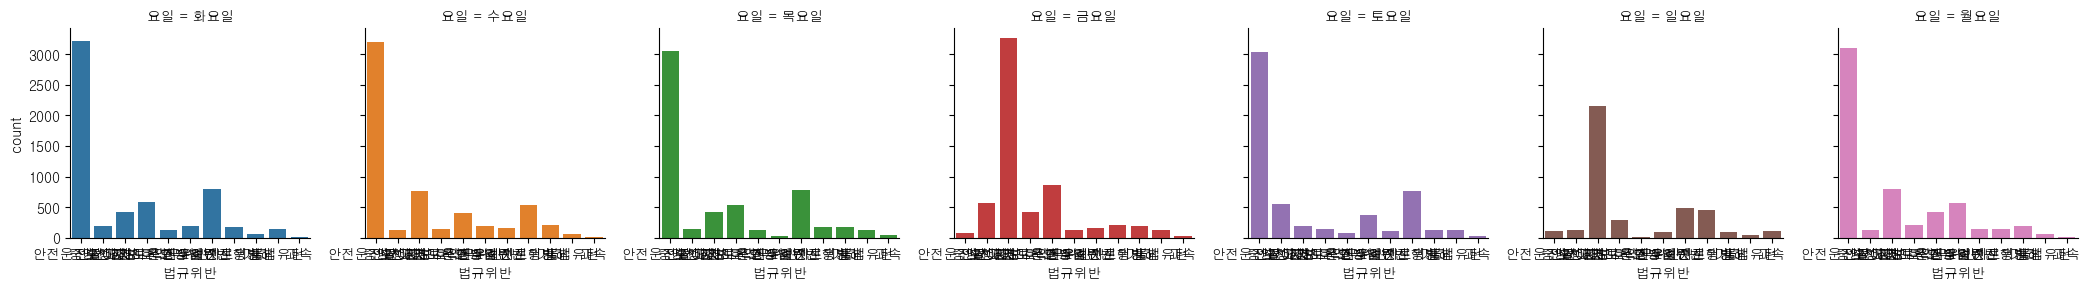

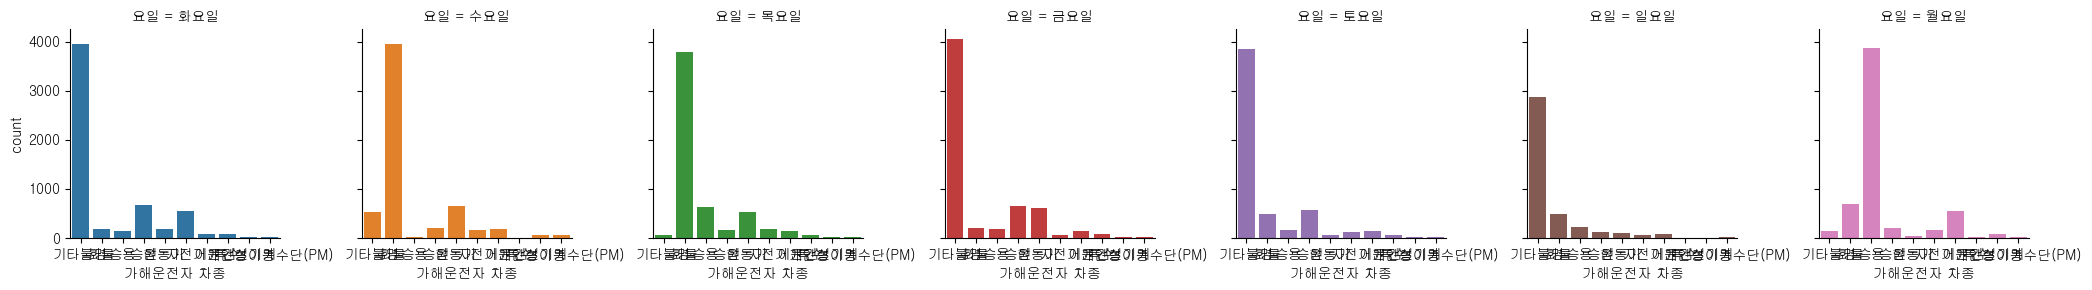

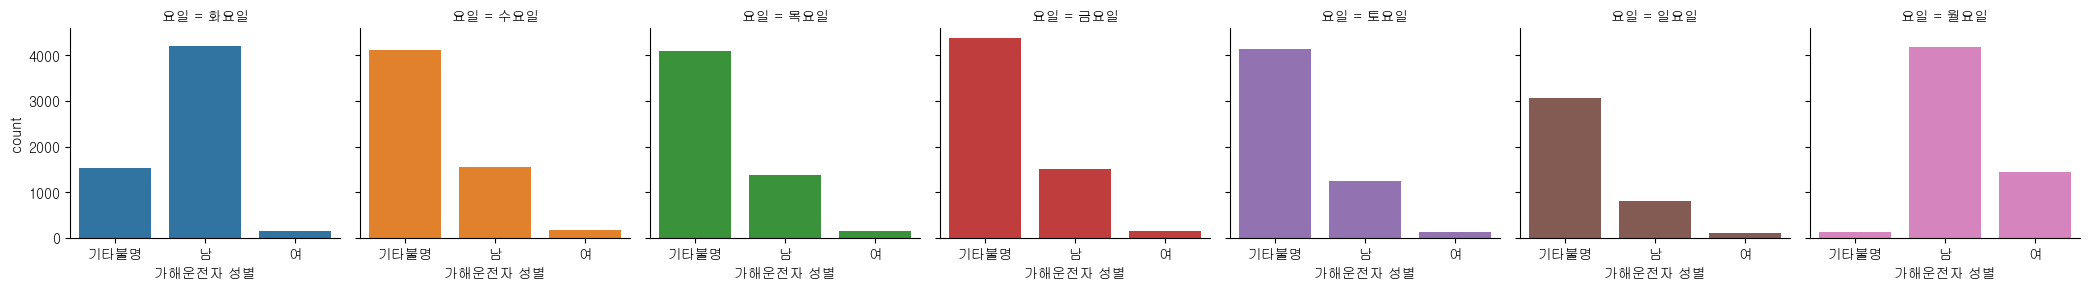

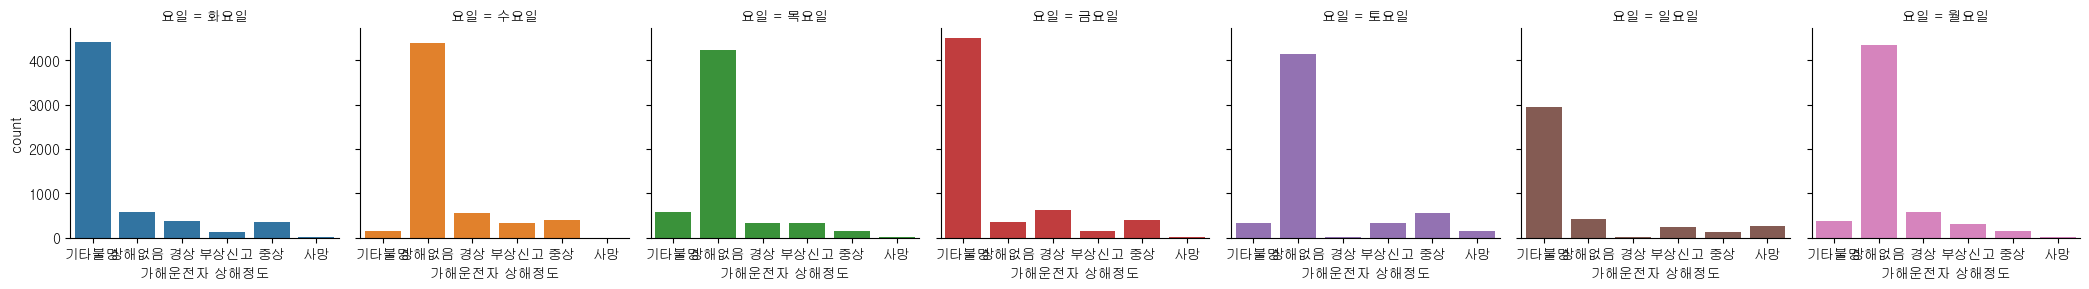

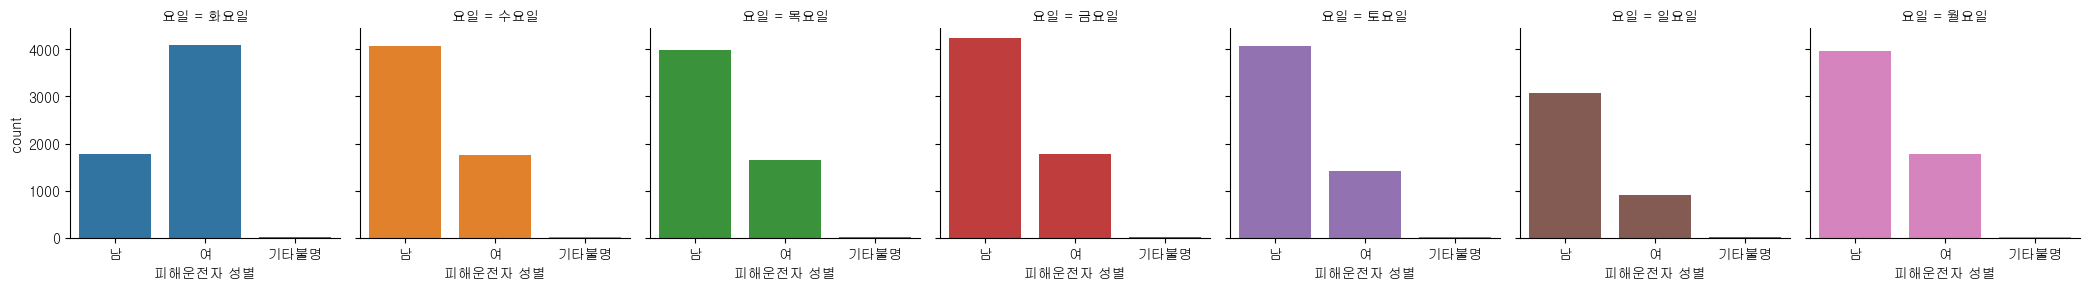

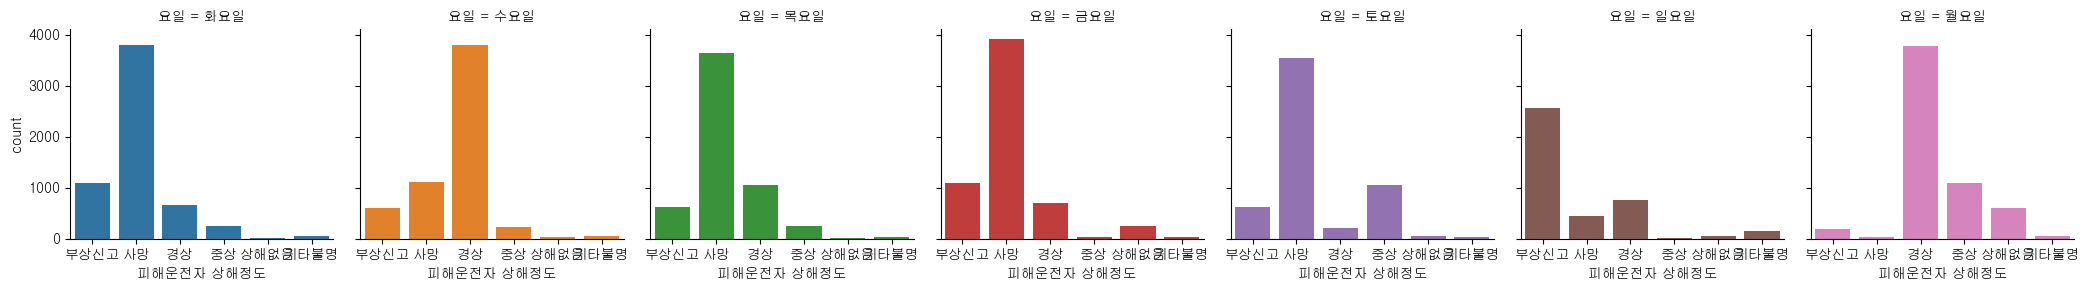

In [82]:
for i, column in enumerate(columns_object):
    if(column == '요일'):
        continue
    if(df_train[column].nunique() > 12):
        continue
    g = sns.FacetGrid(col='요일', hue='요일',data=df_train)
    g.map(sns.countplot,column)
    plt.ylabel('요일별 사고 횟수')
    print(f'{column} is done')

plt.tight_layout()
plt.show()

<Axes: xlabel='요일', ylabel='count'>

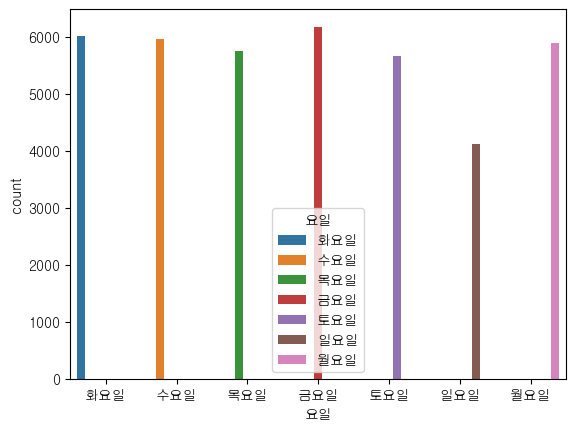

In [65]:
sns.countplot(x='기상상태', hue='요일', data=df_train)

In [40]:
df_train.drop(['ID'],axis =1,inplace=True)

array(['화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '월요일'], dtype=object)

Text(0, 0.5, '요일별 사고 횟수')

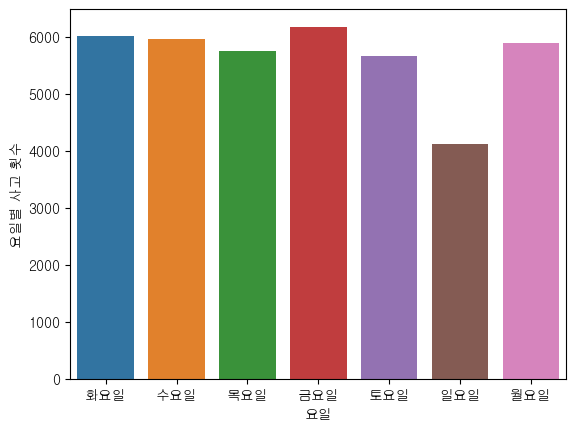

In [32]:
sns.countplot(x='요일',data=df_train)
plt.ylabel('요일별 사고 횟수')

In [37]:
df_train['기상상태'].unique()

array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

Text(0, 0.5, '요일별 사고 횟수')

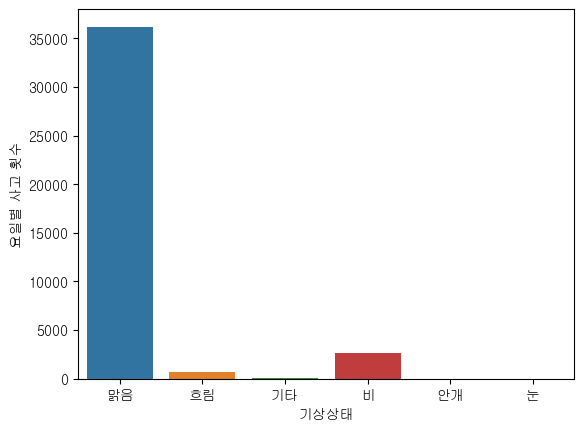

In [38]:
sns.countplot(x='기상상태',data=df_train)
plt.ylabel('요일별 사고 횟수')

<Axes: xlabel='요일', ylabel='ECLO'>

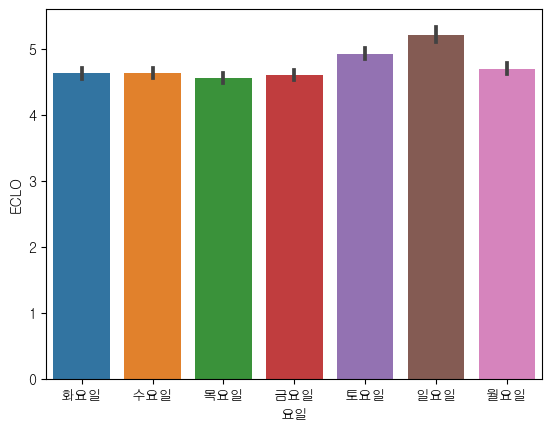

In [30]:
g = sns.FacetGrid(col='요일',data=df_train)